## User Satsfaction Score Prediction

In [1]:
import pandas as pd
import os
import sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [2]:
# Load the xdr_cleaned dataset
data = pd.read_csv('../Data/data/xdr_cleaned.csv')

In [3]:
# Import modules
from user_engagement_analysis import UserEngagementAnalysis
from experience_analytics import ExperienceAnalytics
from satisfaction_analytics import UserSatisfactionAnalytics

In [4]:
# Create instances of engagement and user experience classes
engagement_analysis = UserEngagementAnalysis(data)
experience_analysis = ExperienceAnalytics(data)
satisfaction_analysis = UserSatisfactionAnalytics()


In [5]:
# Normalize and cluster
# Aggregate engagement metrics
engagement_analysis.aggregate_metrics()
engagement_analysis.metrics.head()
engagement_analysis.normalize_and_cluster(n_clusters=3)


In [6]:
# Computer Engagement Score
engagement_features = [
    'total_session_duration',
    'total_download_traffic',
    'total_upload_traffic', 
    'sessions_frequency']

# Identify least engaged cluster
least_engaged_cluster = engagement_analysis.cluster_centers[engagement_features].sum(axis=1).idxmin()

# Compute engagement scores
engagement_scores = satisfaction_analysis.compute_score(
    engagement_analysis.metrics, 
    engagement_analysis.cluster_centers, 
    engagement_features, 'Engagement_Score',
    least_engaged_cluster)


In [7]:
#Check for duplicates in the 'MSISDN/Number' column and count them
duplicate_count = engagement_analysis.metrics.duplicated('MSISDN/Number').sum()
print(f"Number of duplicate entries in 'MSISDN/Number': {duplicate_count}")

Number of duplicate entries in 'MSISDN/Number': 0


In [8]:
engagement_scores.head(20)

,MSISDN/Number,Engagement_Score
0,3.361370e+10,3.165638e+12
1,3.361370e+10,2.442693e+08
2,3.361370e+10,4.146567e+08
3,3.361370e+10,1.199990e+07
4,3.361370e+10,6.566430e+08
5,3.361371e+10,2.136699e+08
6,3.361371e+10,4.558297e+07
7,3.361371e+10,2.847042e+08
8,3.361371e+10,7.609526e+07
9,3.361372e+10,4.150832e+08


In [9]:
# User experience clusters
# Define features
experience_features = ['TCP Retransmission', 'RTT', 'Throughput']

# aggregate and cluster
experience_df, cluster_centers = experience_analysis.k_means_clustering(experience_features)
# rename cluster column
experience_df.rename(columns={'Cluster':'cluster'}, inplace=True)
cluster_centers.rename(columns={'Cluster':'cluster'}, inplace=True)
# Identify worst experience cluster
worst_cluster = cluster_centers[experience_features].sum(axis=1).idxmin()


In [10]:
# Computer User experience scores
experience_scores = satisfaction_analysis.compute_score(
    experience_df, 
    cluster_centers, 
    experience_features, 'Experience_Score',
    worst_cluster)

Engagement vs Experience Scores

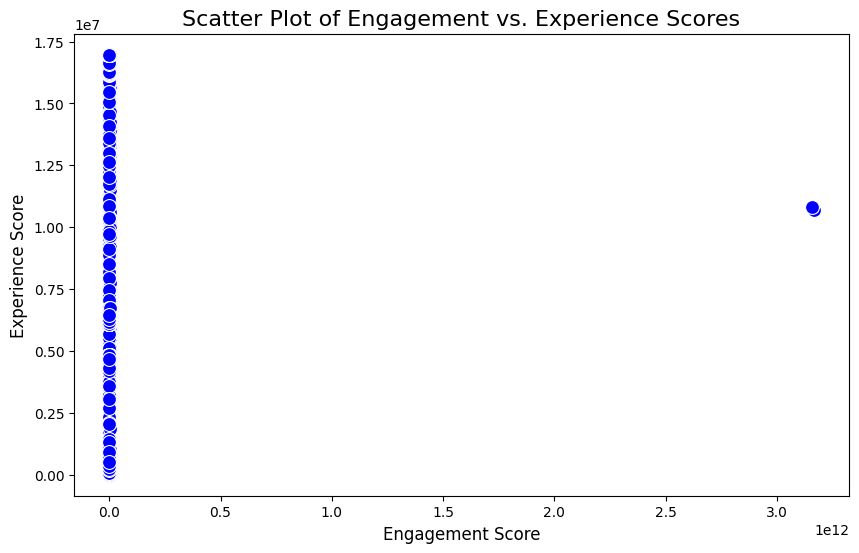

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=engagement_scores['Engagement_Score'], 
    y=experience_scores['Experience_Score'], 
    data=pd.merge(engagement_scores,experience_scores, on='MSISDN/Number'), color='blue', s=100)

# Add titles and labels
plt.title('Scatter Plot of Engagement vs. Experience Scores', fontsize=16)
plt.xlabel('Engagement Score', fontsize=12)
plt.ylabel('Experience Score', fontsize=12)

# Show the plot
plt.show()

In [11]:
experience_scores.head(20)

,MSISDN/Number,Experience_Score
0,3.361370e+10,1.069252e+07
1,3.361370e+10,8.426239e+06
2,3.361370e+10,1.696894e+07
3,3.361370e+10,1.696894e+07
4,3.361370e+10,6.329150e+06
5,3.361371e+10,4.048265e+06
6,3.361371e+10,1.696894e+07
7,3.361371e+10,1.696893e+07
8,3.361371e+10,2.451801e+06
9,3.361372e+10,4.825071e+06


In [12]:
# Compute satisfaction scores and get top 10 satisfied customers
satisfaction_scores = satisfaction_analysis.compute_satisfaction_score(
    engagement_scores, 
    experience_scores)


In [13]:
# Top 10 Satisfied customers
top_10_satisfied_customers = satisfaction_analysis.top_satisfied_customer(
    engagement_scores, 
    experience_scores
)
top_10_satisfied_customers

,MSISDN/Number,Satisfaction_Score
0,3.361370e+10,1.582824e+12
89330,3.376819e+10,1.579123e+12
710,3.361489e+10,3.816513e+09
81535,3.376054e+10,3.701537e+09
7011,3.362578e+10,3.639125e+09
66074,3.367588e+10,3.423583e+09
7330,3.362632e+10,3.417754e+09
29278,3.365973e+10,3.314432e+09
53662,3.366646e+10,3.199578e+09
48246,3.366471e+10,2.948577e+09


In [14]:
# Satisfaction prediction using LinearRegression Model
satisfaction_analysis.build_regression_model(
    engagement_scores, experience_scores)

Mean Squared Error: 8.342419941396403e-11
R-squared: 1.0


LinearRegression()

In [15]:
# Satisfaction prediction using Lasso Model
satisfaction_analysis.build_regression_model(
    engagement_scores, experience_scores, model_type='lasso')

Mean Squared Error: 0.5585386955188698
R-squared: 1.0


Lasso()

In [16]:
# Satisfaction prediction using Ridge Model
satisfaction_analysis.build_regression_model(
    engagement_scores, experience_scores, model_type='rigde')

Mean Squared Error: 3.003166448065868e-11
R-squared: 1.0


Ridge()

In [17]:
# Clustering engagement scores and experience scores
cluster_df = satisfaction_analysis.perform_clustering(
    engagement_scores, experience_scores
)

In [18]:
cluster_df

,MSISDN/Number,Engagement_Score,Experience_Score,Satisfaction_Score,Cluster
0,3.361370e+10,3.165638e+12,1.069252e+07,1.582824e+12,1
1,3.361370e+10,2.442693e+08,8.426239e+06,1.263478e+08,0
2,3.361370e+10,4.146567e+08,1.696894e+07,2.158128e+08,0
3,3.361370e+10,1.199990e+07,1.696894e+07,1.448442e+07,0
4,3.361370e+10,6.566430e+08,6.329150e+06,3.314861e+08,0
...,...,...,...,...,...
89326,3.376818e+10,1.179340e+09,1.696894e+07,5.981546e+08,0
89327,3.376818e+10,1.553796e+07,1.696894e+07,1.625345e+07,0
89328,3.376819e+10,3.989745e+08,1.696894e+07,2.079717e+08,0
89329,3.376819e+10,6.568295e+07,6.456152e+06,3.606955e+07,0


In [19]:
# Aggregate the average satisfaction and experience scores per cluster
cluster_agg = cluster_df.groupby('Cluster').agg({
    'Experience_Score': 'mean',
    'Satisfaction_Score': 'mean'
}).reset_index()


In [20]:
cluster_agg

,Cluster,Experience_Score,Satisfaction_Score
0,0,1.170348e+07,1.734156e+08
1,1,1.075631e+07,1.580974e+12


In [21]:
# Insert the satisfaction scores data into postgresql
satisfaction_analysis.export_to_postgresql(satisfaction_scores)

Error: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: Connection refused
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/20/e3q8)


UnboundLocalError: cannot access local variable 'connection' where it is not associated with a value

In [ ]:
# Save the engagement and experience scores as csv files for dashboard
engagement_scores.to_csv('../Data/data/engagement_score.csv')
experience_scores.to_csv('../Data/data/experience_score.csv')